#  GTNNWR Case--spatial and temporal distribution of key nutrients in coastal waters

## 1 Case Introduction 

###  1.1 Case Introduction 

**A spatiotemporal-intelligent method for fine-scale retrieval of DSi in coastal seas**

This case shows a spatiotemporally weighted intelligent method acquired high-resolution and long-term distributions of coastal dissolved silicate (DSi). Fine-scale DSi changes and influences driven by biological and physical factors were observed and revealed in coastal seas.  

The migration of dissolved silicate (DSi) from land to coastal environments is an important component of the global biogeochemical cycle. Due to the strong land-ocean interaction in coastal waters, the spatial distribution of coastal DSi exhibits irregular characteristics (influenced by land input and ocean terrain), and the time changes rapidly with brief periodic fluctuations (influenced by biological effects and ocean currents). However, due to the immaturity of spatiotemporal modeling and the low resolution of data sampling, current research on coastal DSi typically depicts its rough changes with spatial and seasonal temporal resolutions of hundreds of kilometers. Therefore, this project will combine advanced spatiotemporal analysis models and high-resolution datasets to analyze changes in the distribution of offshore DSi at higher spatiotemporal resolutions.

> [Qi, J., Du, Z., Wu, S., Chen, Y., & Wang, Y. (2023). A spatiotemporally weighted intelligent method for exploring fine-scale distributions of surface dissolved silicate in coastal seas. Science of The Total Environment , 886, 163981.  ](https://doi.org/10.1016/j.scitotenv.2023.163981)  

### 1.2 Data used

The DSi dataset of Zhejiang offshore surface from 2010 to 2018 (obtained by matching the MODIS remote sensing dataset with the dissolved silicate site dataset on the offshore surface).

### 1.3 Case Process 

- Dependency Library Installation 
- Dataset Import 
- Model Settings 
- Model Training 
- Model Result Output

### 1.4 Schematic diagram of the research area


![Image Name](https://mydde.deep-time.org/s3/static-files/upload/upload/1695121607986_1.jpg)  

## 2 Preparations

Import Libraries

In [1]:
from gnnwr.models import GTNNWR
from gnnwr.datasets import init_dataset
import numpy as np
import pandas as pd

## 3 Model Training

### 3.1 Dataset Import

In [2]:
data = pd.read_csv('../data/demo_data_gtnnwr.csv')
data.head()

,refl_b01,refl_b02,refl_b03,refl_b04,refl_b05,refl_b07,proj_x,proj_y,day,SiO3
0,1895,1251,1737,1872,543,280,736685.4179,3314205.295,113,1.049
1,1621,1066,1435,1665,757,511,736685.4179,3314205.295,121,1.209
2,1587,1141,1807,1864,1211,1024,736685.4179,3314205.295,152,1.102
3,1121,1012,1411,1324,711,485,768193.4945,3402138.581,168,0.945
4,913,203,840,1035,114,63,736685.4179,3314205.295,200,1.350


Through the `init_dataset()` function, users can set input data, test set size, validation set size, independent variable, dependent variable, spatial attribute, time attribute, numbered column, random seed, and batch size.

The initialized dataset can be saved using the `save()` method and the read method can be used to `read()` the saved results.

In [3]:
data["id"] = np.arange(len(data))
train_dataset, val_dataset, test_dataset = init_dataset(data=data,
                                                        test_ratio=0.15,
                                                        valid_ratio=0.1,
                                                        x_column=['refl_b01', 'refl_b02',
                                                                  'refl_b03', 'refl_b04', 'refl_b05',
                                                                  'refl_b07'],
                                                        y_column=['SiO3'],
                                                        spatial_column=[
                                                            'proj_x', 'proj_y'],
                                                        temp_column=['day'],
                                                        id_column=['id'],
                                                        use_model="gtnnwr",
                                                        sample_seed=48,
                                                        batch_size=1024)

### 3.2 Model Settings  

The model accepts parameters such as training set, validation set, test set, hidden layer, and optimizer, and can set network structure, optimizer type, and learning rate adjustment method.

The `add_graph()` function can be used to save the graph structure (chart) of the model, which can be viewed in Tensorboard.

In [4]:
optimizer_params = {
    "scheduler": "MultiStepLR",
    "scheduler_milestones": [1000, 2000, 3000, 4000],
    "scheduler_gamma": 0.8,
}
gtnnwr = GTNNWR(train_dataset, val_dataset, test_dataset, [[3], [512, 256, 64]], drop_out=0.4, optimizer='Adadelta', optimizer_params=optimizer_params,
                write_path="../demo_result/gtnnwr/runs/",  # 这里需要修改
                model_save_path="../demo_result/gtnnwr/models/",
                log_path="../demo_result/gtnnwr/logs/",
                model_name="GTNNWR_DSi")
gtnnwr.add_graph()

Add Graph Successfully


### 3.3 Model Training   

The `run()` function is used to train the model.

In [5]:
gtnnwr.run(200, 50)

100%|██████████| 200/200 [04:21<00:00,  1.31s/it, Train Loss=0.653496, Train R2=-0.134937, Train AIC=tensor(5356.1221, device='cuda:0', grad_fn=<AddBackward0>), Valid Loss=0.423, Valid R2=0.207, Best Valid R2=0.227, Learning Rate=0.1]    


### 3.4 Model Result Output

Using `result()` can obtain the basic information of the optimal model and the running results of the model on the test set

Using `reg_result()` can save the running results of the optimal model on the entire dataset, including the spatiotemporal non-stationary weights calculated by the model.

In [6]:
gtnnwr.result()


--------------------Result Information----------------
Test Loss: |                   0.42167
Test R2  : |                   0.22940
Train R2 : |                   0.23413
Valid R2 : |                   0.22738
RMSE: |                        0.64936
MAE:  |                        0.43158
AICc: |                      866.31360


In [7]:
result_data = gtnnwr.reg_result('../demo_result/gtnnwr/gtnnwr_result.csv')
result_data

,coef_refl_b01,coef_refl_b02,coef_refl_b03,coef_refl_b04,coef_refl_b05,coef_refl_b07,bias,Pred_SiO3,id,dataset_belong,denormalized_pred_result
0,5.934404,-1.267197,0.356277,-1.232222,-2.402276,-0.719442,0.982741,1.851953,1021,train,1.851953
1,5.013245,0.113633,0.228969,-4.218602,0.524012,0.080134,0.720670,1.020442,2245,train,1.020442
2,4.882484,1.139913,-0.037559,0.081460,0.692167,-2.044968,0.350943,1.309780,2286,train,1.309780
3,10.419376,-0.308755,0.484652,-10.272596,-1.066396,2.813890,1.054368,0.745561,423,train,0.745561
4,3.306318,0.495872,-0.057220,-0.511816,1.069415,3.165686,0.721550,1.074494,2414,train,1.074494
...,...,...,...,...,...,...,...,...,...,...,...
2896,5.082086,-1.124179,0.331291,-1.093745,-1.990483,-0.139488,1.014790,1.758111,823,test,1.758111
2897,6.426098,-1.334916,0.367610,1.369598,-4.287067,0.098724,0.781445,1.862610,760,test,1.862610
2898,-2.486922,-0.640918,0.206675,5.129038,-3.191843,1.711392,0.854366,1.204165,722,test,1.204165
2899,8.482934,-1.459014,0.375015,-0.068822,-4.548077,-0.023875,0.820383,2.407335,913,test,2.407335


### 3.5 Analysis of model results


The output results of the model can be imported and analyzed through drawing images and other methods.

R2: 0.23329634191169202


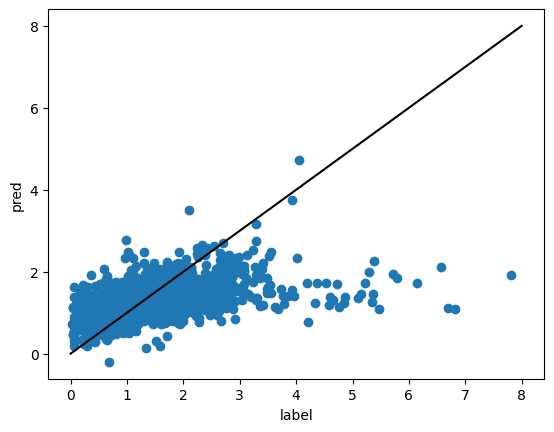

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as r2
result_data.sort_values(by='id', inplace=True)
data.sort_values(by='id', inplace=True)
print('R2:', r2(data['SiO3'], result_data['Pred_SiO3']))
plt.scatter(data['SiO3'], result_data['Pred_SiO3'])
plt.plot([i for i in range(9)], [i for i in range(9)], color='black')
plt.xlabel('label')
plt.ylabel('pred')
plt.show()

In [9]:
ana_data = pd.merge(data, result_data, on='id')

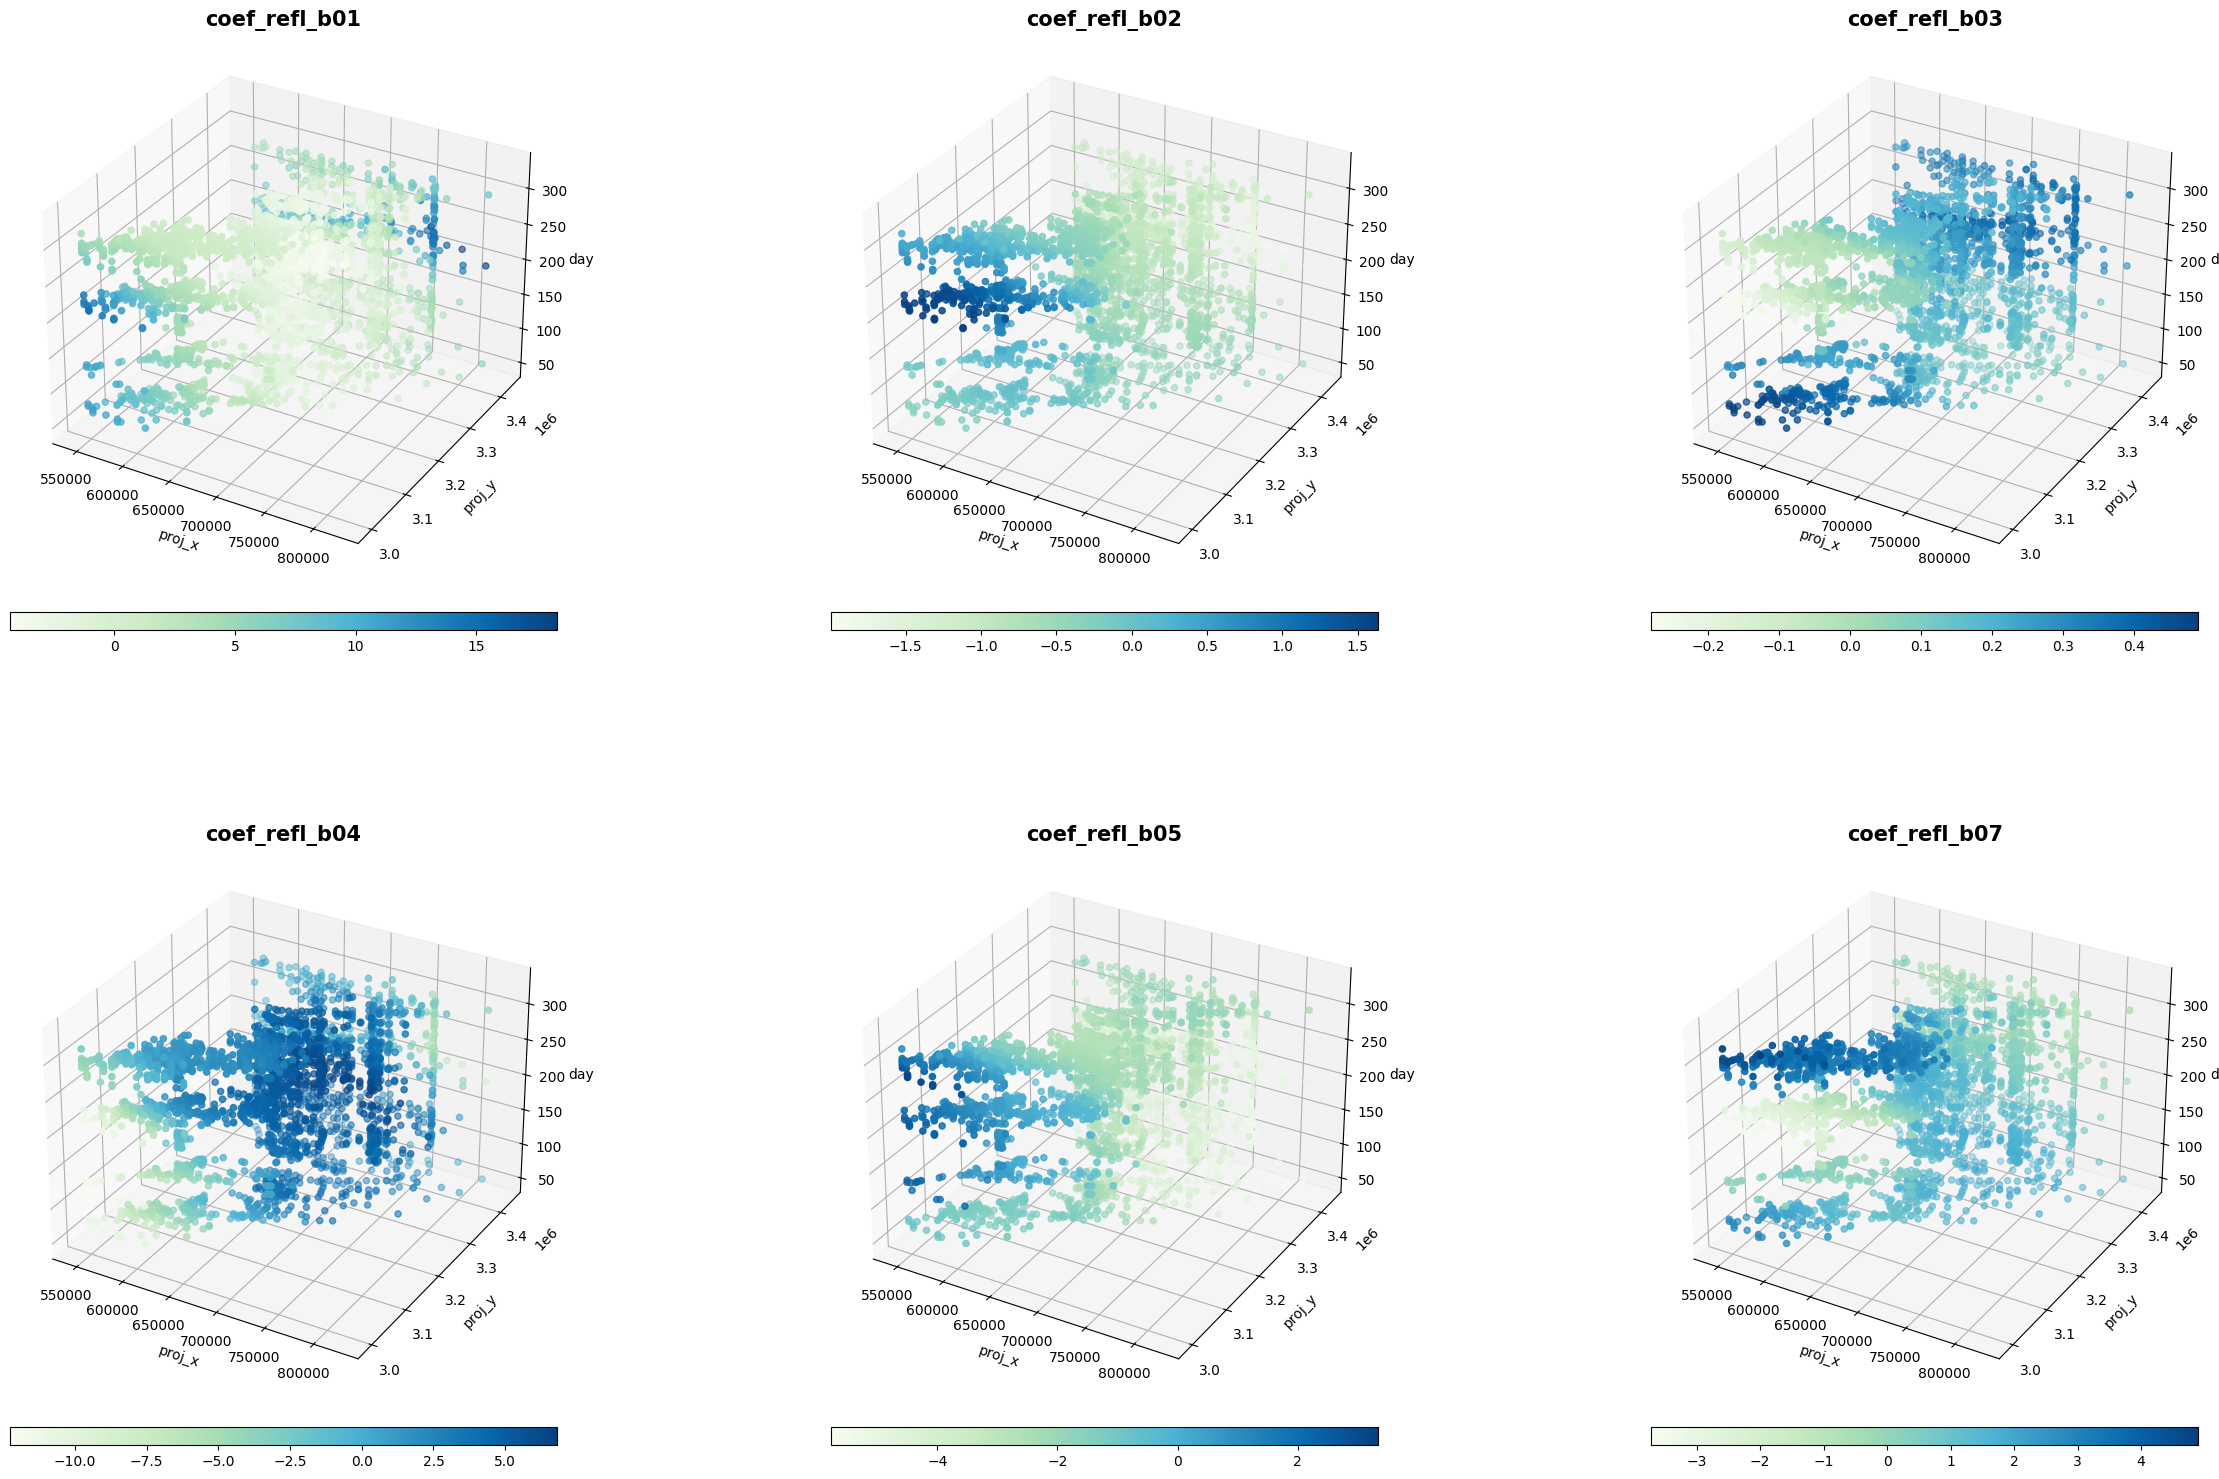

In [10]:
fig = plt.figure(figsize=(30, 30))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
id = 1
for i in [1, 2, 3, 4, 5, 7]:
    ax = fig.add_subplot(3, 3, id, projection='3d')
    fig.colorbar(ax.scatter(ana_data['proj_x'], ana_data['proj_y'], ana_data['day'],
                            c=ana_data['coef_refl_b0'+str(i)], cmap='GnBu'),
                 shrink=0.8, aspect=30, orientation='horizontal', pad=0.05)
    ax.set_xlabel('proj_x')
    ax.set_ylabel('proj_y')
    ax.set_zlabel('day')
    ax.set_title('coef_refl_b0'+str(i), fontsize=15, fontweight='bold')
    id += 1